<a href="https://colab.research.google.com/github/Jassmine11/cfpb-complaints-project/blob/main/CFPB_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load and inspect the data**

In [67]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
!pip install gdown


In [69]:
import gdown

url = "https://drive.google.com/uc?id=1UCLpDLu_kzoSKGWer8Hp8DXGE0yy3XWu"
output = "consumer_complaints.csv"

gdown.download(url, output, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1UCLpDLu_kzoSKGWer8Hp8DXGE0yy3XWu
From (redirected): https://drive.google.com/uc?id=1UCLpDLu_kzoSKGWer8Hp8DXGE0yy3XWu&confirm=t&uuid=cc628a71-4e22-4cc6-b8b9-8572fb01f65f
To: /content/consumer_complaints.csv
100%|██████████| 1.41G/1.41G [00:18<00:00, 75.4MB/s]


'consumer_complaints.csv'

In [70]:
import gdown
import zipfile
import os
import pandas as pd

# Step 1: Download the ZIP file from Google Drive
url = "https://drive.google.com/uc?id=1UCLpDLu_kzoSKGWer8Hp8DXGE0yy3XWu"
output_zip = "consumer_complaints.zip"
gdown.download(url, output_zip, quiet=False)

# Step 2: Unzip the file
extract_folder = './consumer_complaints/'
os.makedirs(extract_folder, exist_ok=True)

with zipfile.ZipFile(output_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Step 3: Check extracted files
extracted_files = os.listdir(extract_folder)
print("Extracted files:", extracted_files)

# Step 4: Load the CSV (assuming single CSV in zip)
csv_file = os.path.join(extract_folder, extracted_files[0])

# Step 5: Read a sample from the CSV (to avoid memory issues)
df_sample = pd.read_csv(csv_file, nrows=100000)
print(df_sample.head())


Downloading...
From (original): https://drive.google.com/uc?id=1UCLpDLu_kzoSKGWer8Hp8DXGE0yy3XWu
From (redirected): https://drive.google.com/uc?id=1UCLpDLu_kzoSKGWer8Hp8DXGE0yy3XWu&confirm=t&uuid=c34e773a-52f4-4492-9f04-43167e2b3253
To: /content/consumer_complaints.zip
100%|██████████| 1.41G/1.41G [00:13<00:00, 105MB/s]


Extracted files: ['complaints.csv']
  Date received                                            Product  \
0    2025-07-20                                    Debt collection   
1    2025-08-07  Credit reporting or other personal consumer re...   
2    2025-08-06  Credit reporting or other personal consumer re...   
3    2025-08-07  Credit reporting or other personal consumer re...   
4    2025-08-06  Credit reporting or other personal consumer re...   

        Sub-product                                 Issue  \
0       Rental debt             Electronic communications   
1  Credit reporting           Improper use of your report   
2  Credit reporting  Incorrect information on your report   
3  Credit reporting           Improper use of your report   
4  Credit reporting           Improper use of your report   

                                           Sub-issue  \
0  You told them to stop contacting you, but they...   
1      Reporting company used your report improperly   
2       

In [71]:
# Check data types and summary info
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 100000 non-null  object
 1   Product                       100000 non-null  object
 2   Sub-product                   99020 non-null   object
 3   Issue                         100000 non-null  object
 4   Sub-issue                     95486 non-null   object
 5   Consumer complaint narrative  26861 non-null   object
 6   Company public response       31529 non-null   object
 7   Company                       100000 non-null  object
 8   State                         99668 non-null   object
 9   ZIP code                      99890 non-null   object
 10  Tags                          5051 non-null    object
 11  Consumer consent provided?    50897 non-null   object
 12  Submitted via                 100000 non-null  object
 13  

In [72]:
# Check for missing values and duplicates
df_sample.isnull().sum()
df_sample.duplicated().sum()

np.int64(0)

In [73]:
# check shape ( rows and columns)
# look at column names
# check data types and missing values

print("Shape:", df_sample.shape)
print("\nColumns:", df_sample.columns.tolist())
print("\nData types:\n", df_sample.dtypes)
print("\nMissing values per column:\n", df_sample.isnull().sum())


Shape: (100000, 18)

Columns: ['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue', 'Consumer complaint narrative', 'Company public response', 'Company', 'State', 'ZIP code', 'Tags', 'Consumer consent provided?', 'Submitted via', 'Date sent to company', 'Company response to consumer', 'Timely response?', 'Consumer disputed?', 'Complaint ID']

Data types:
 Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consum

In [74]:
# statistics

print(df_sample.describe())


       Complaint ID
count  1.000000e+05
mean   1.139787e+07
std    4.215211e+06
min    2.199000e+03
25%    8.506817e+06
50%    1.381679e+07
75%    1.497561e+07
max    1.519104e+07


**Data** **Cleaning**


In [75]:
#Fill common missing values
for col in ['Sub-product', 'Sub-issue', 'ZIP code', 'State']:
    df_sample[col] = df[col].fillna('Unknown')

**Analysis**

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
from textblob import TextBlob
import missingno as msno
import geopandas as gpd
import plotly.express as px
from scipy.stats import chi2_contingency

In [77]:

# Assuming your dataframe is df_sample
df = df_sample.copy()

/tmp/ipython-input-996048823.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




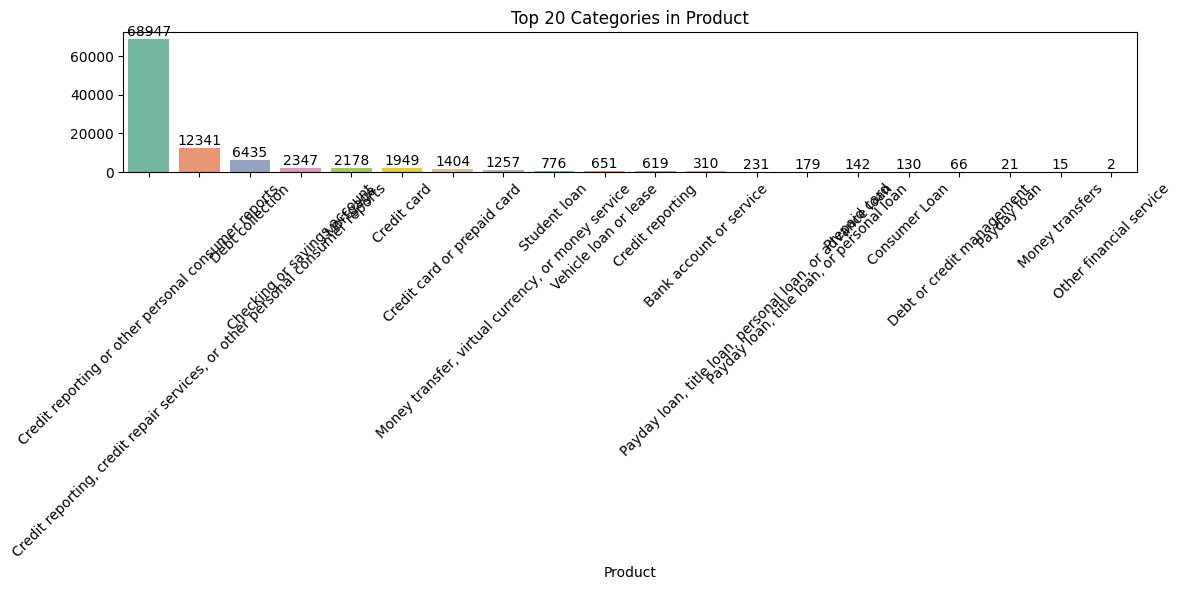

/tmp/ipython-input-996048823.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




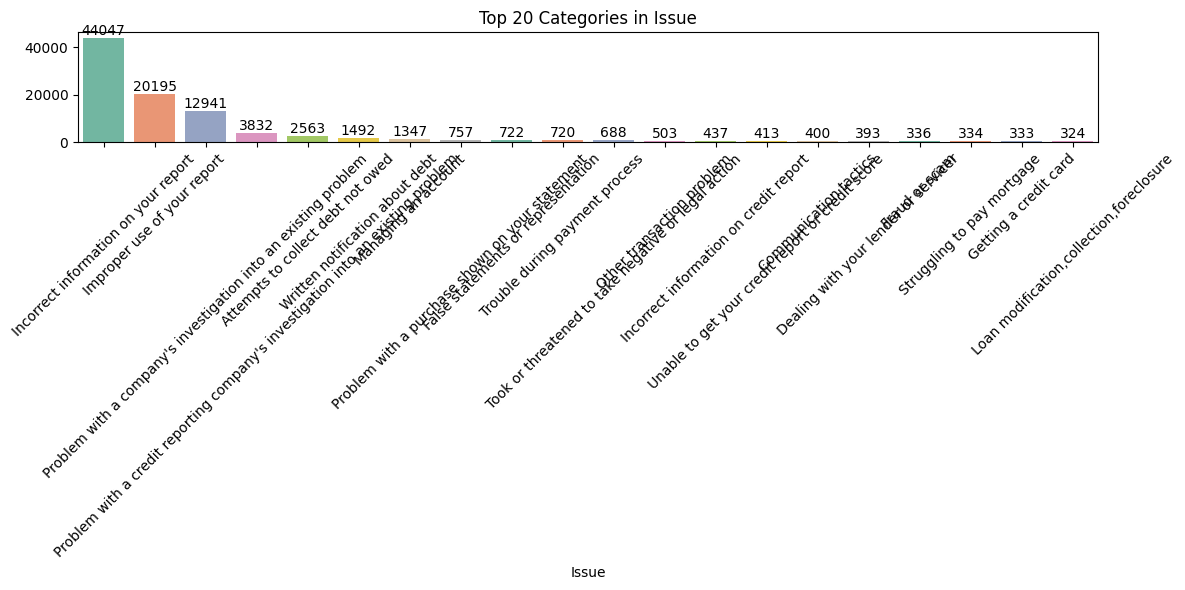

/tmp/ipython-input-996048823.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




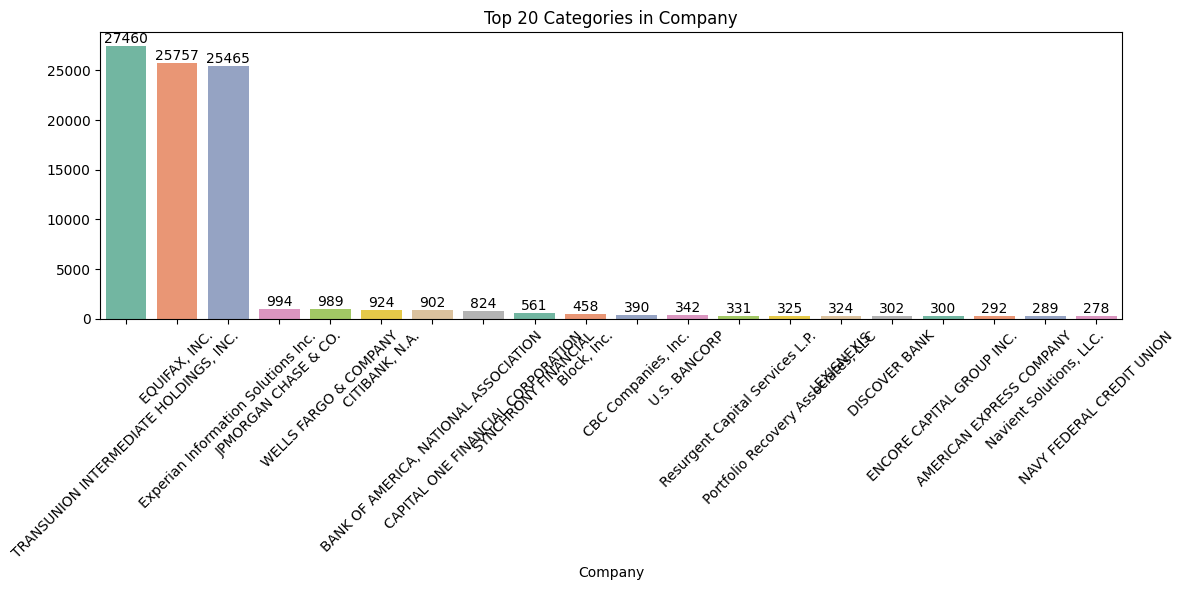

/tmp/ipython-input-996048823.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




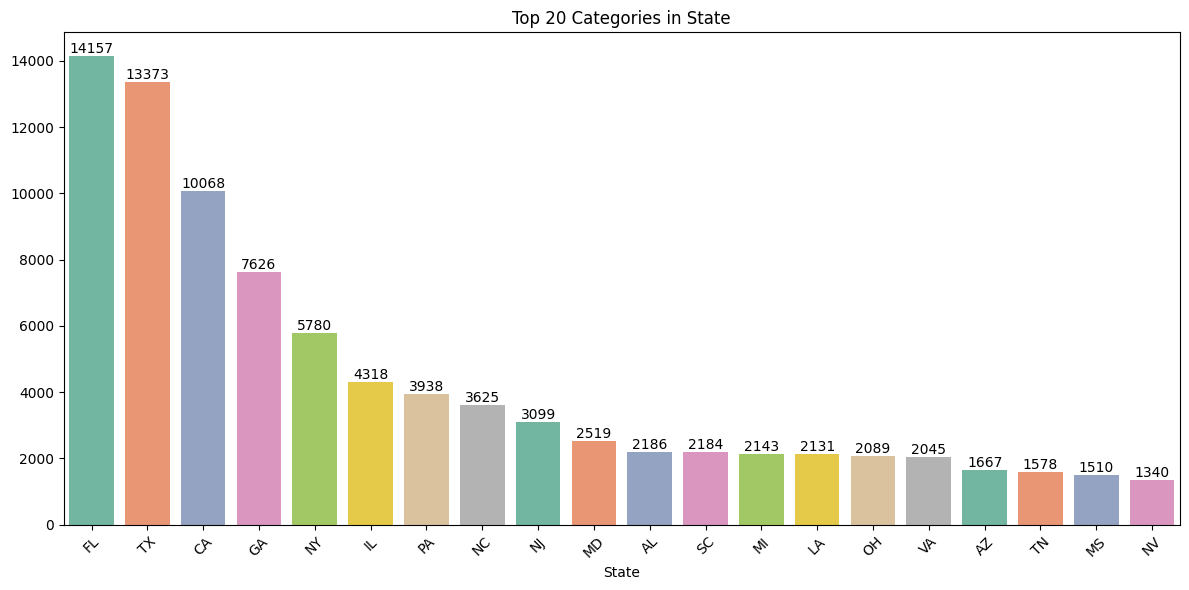

In [78]:
#Enhanced categorical plots with value labels
def plot_count_with_labels(df, col, top_n=20):
    plt.figure(figsize=(12,6))
    counts = df[col].value_counts().nlargest(top_n)
    ax = sns.barplot(x=counts.index, y=counts.values, palette="Set2")
    plt.title(f"Top {top_n} Categories in {col}")
    plt.xticks(rotation=45)
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x()+p.get_width()/2., p.get_height()),
                    ha='center', va='bottom', fontsize=10)
    plt.tight_layout()
    plt.show()

for col in ['Product', 'Issue', 'Company', 'State']:
    if col in df.columns:
        plot_count_with_labels(df, col)

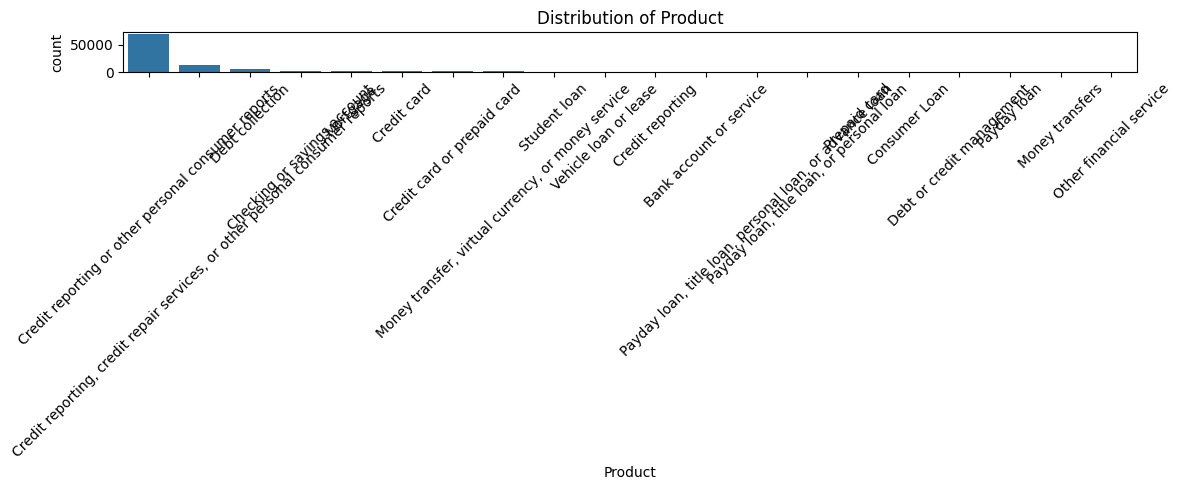

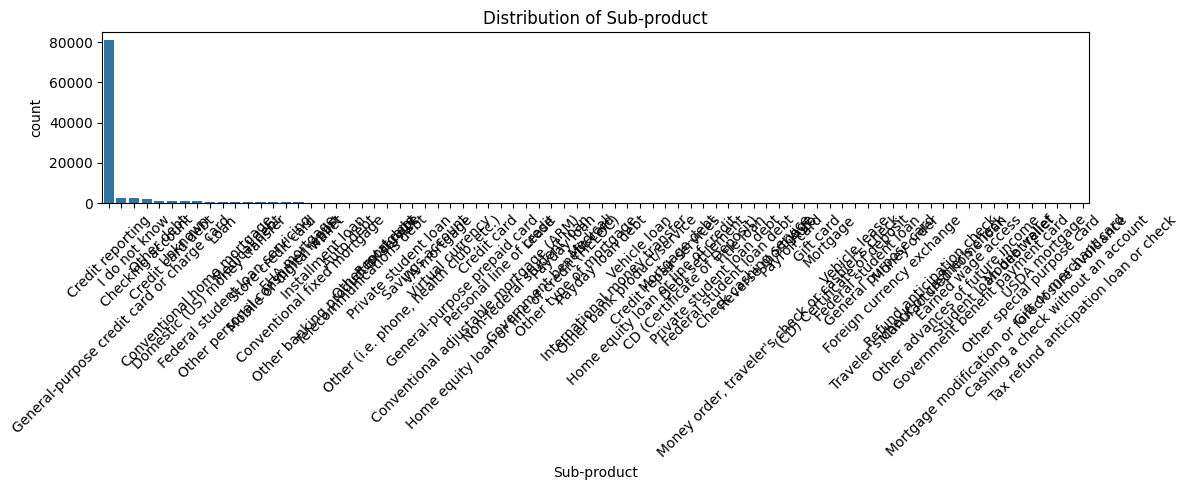

/tmp/ipython-input-2368764142.py:12: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.



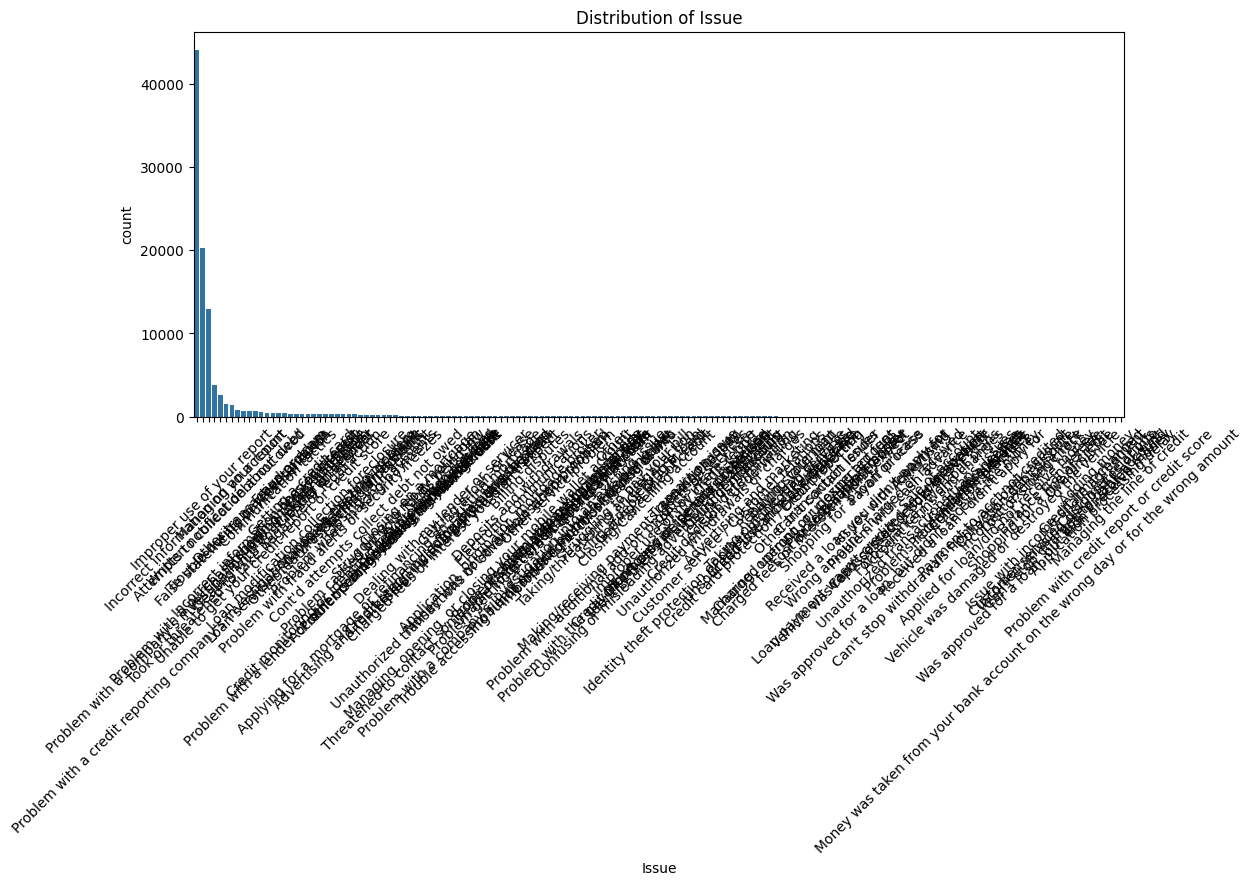

/tmp/ipython-input-2368764142.py:12: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.



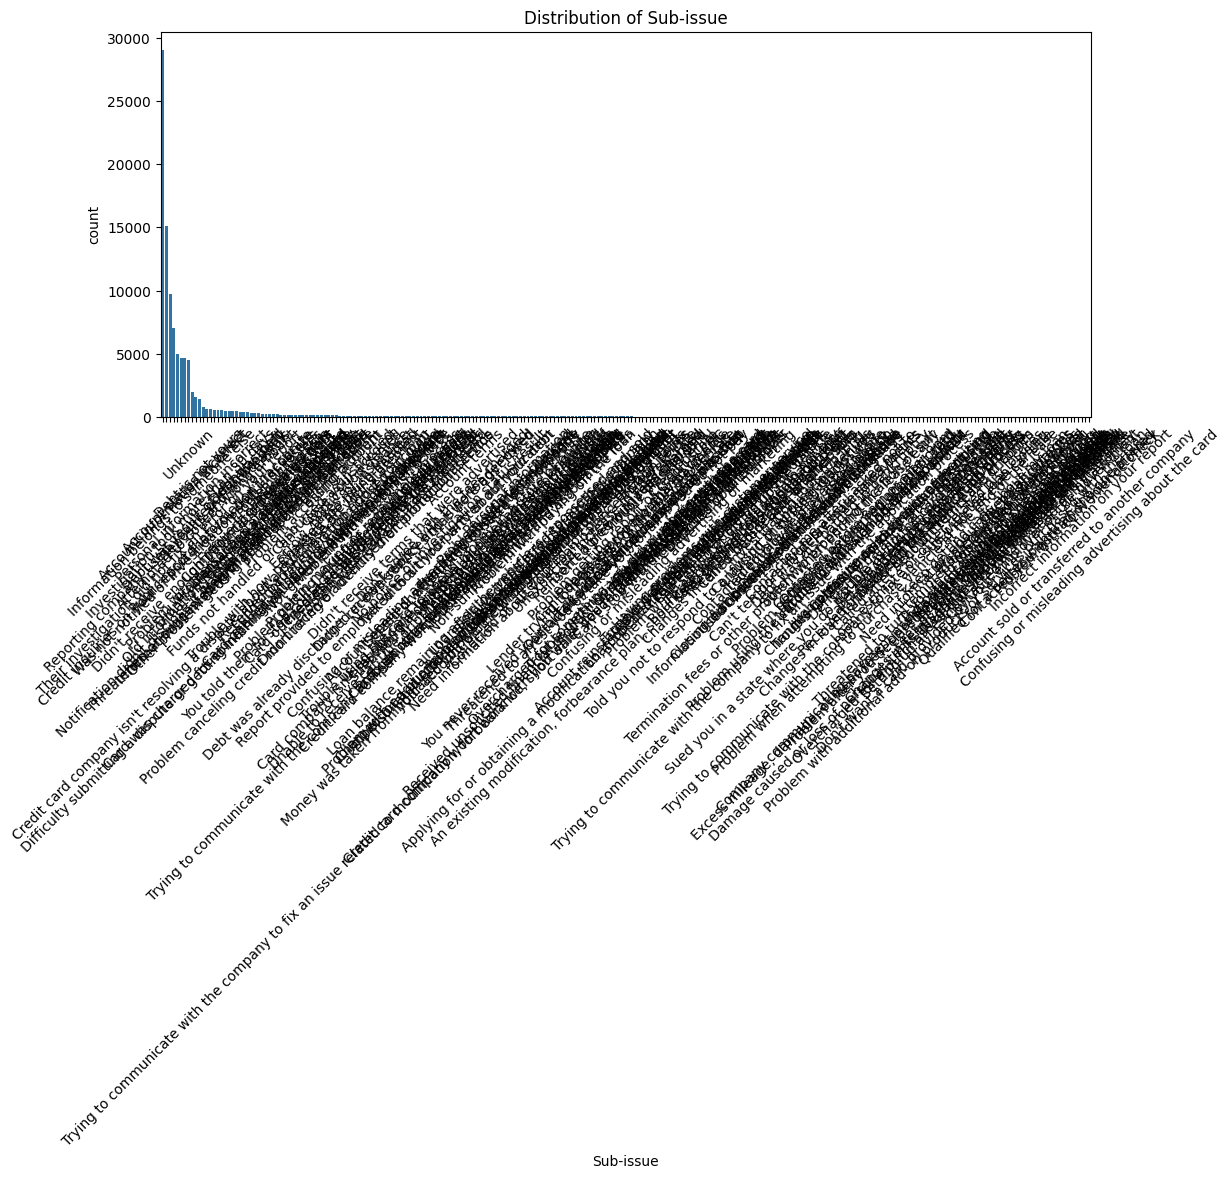

/tmp/ipython-input-2368764142.py:12: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.



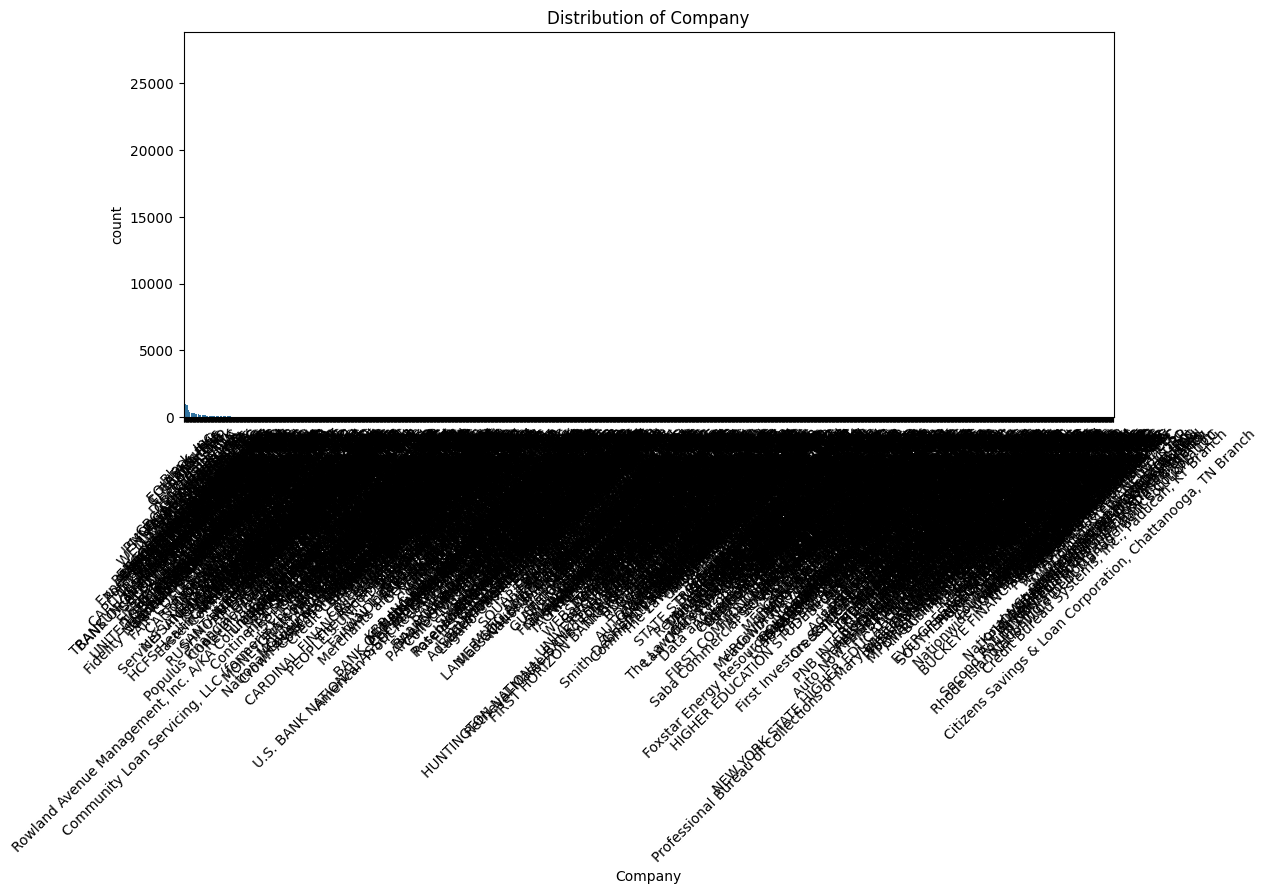

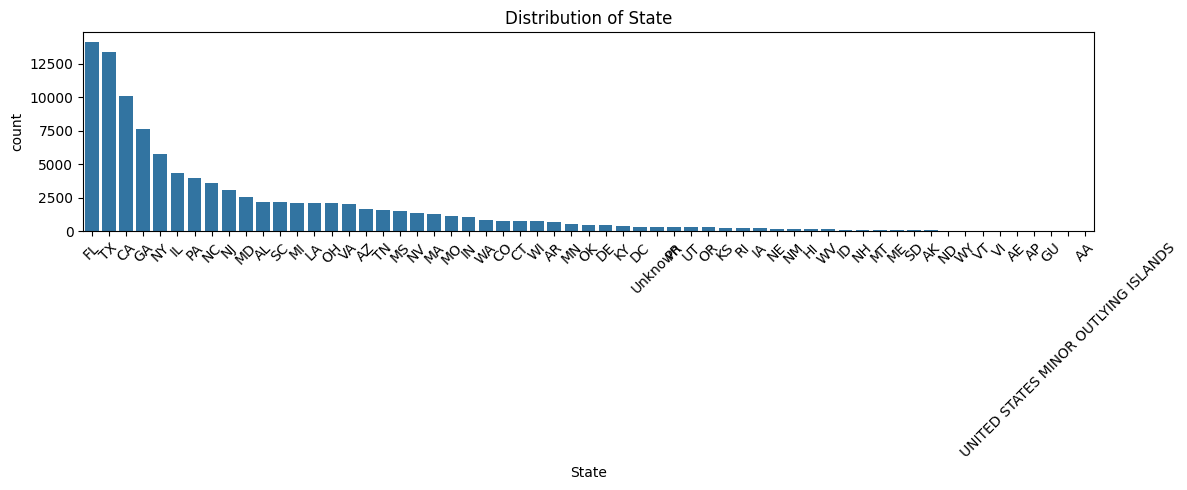

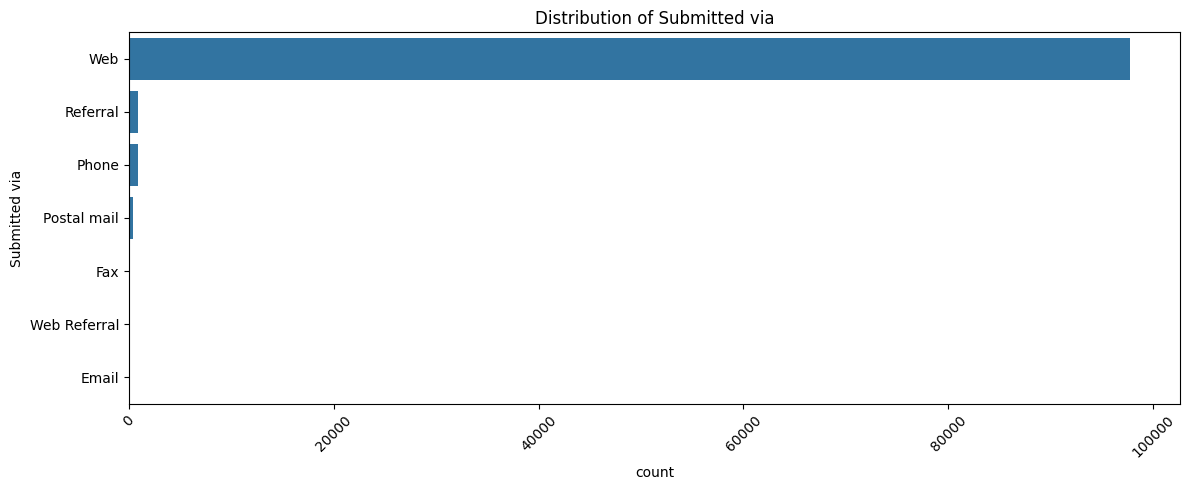

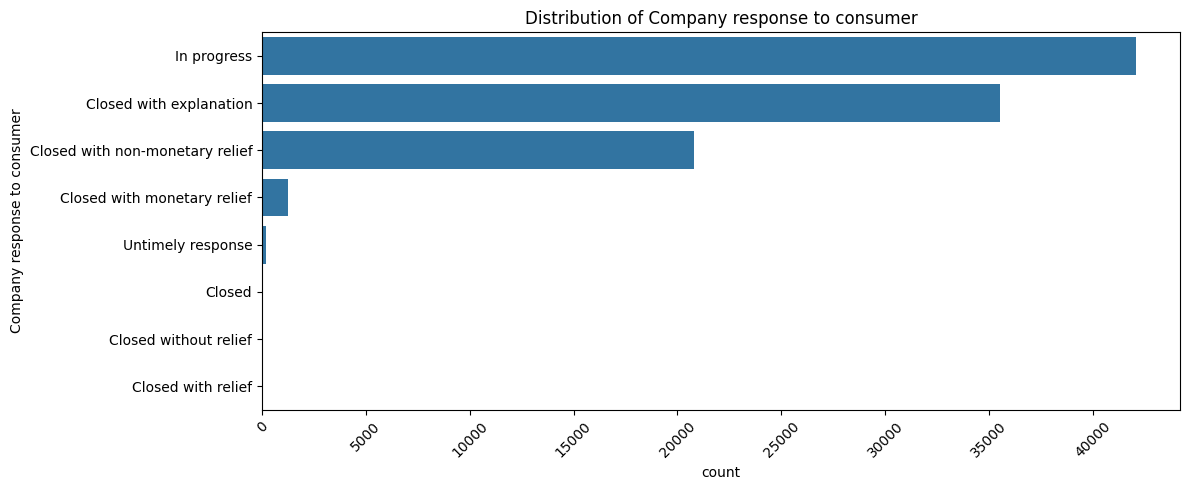

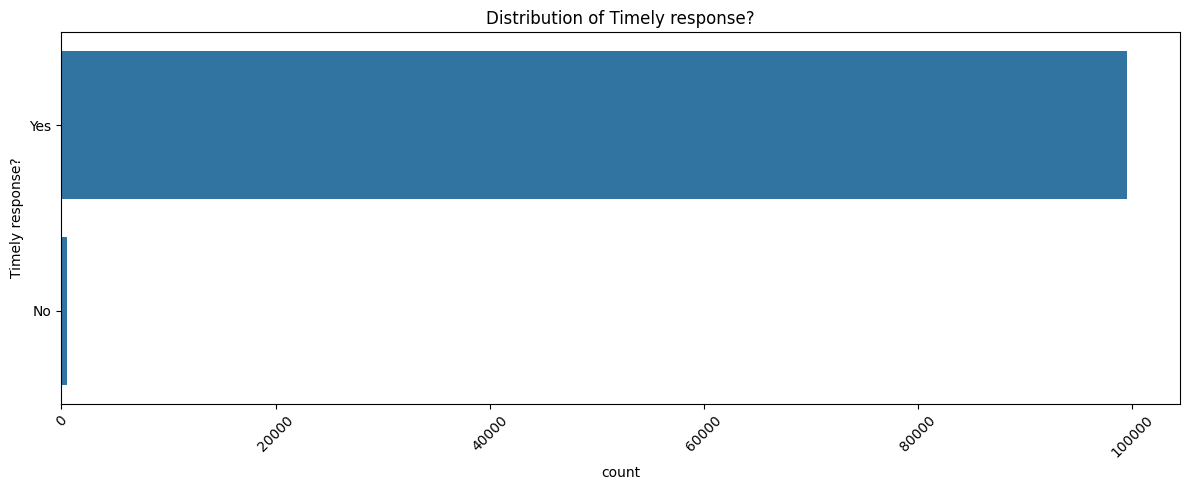

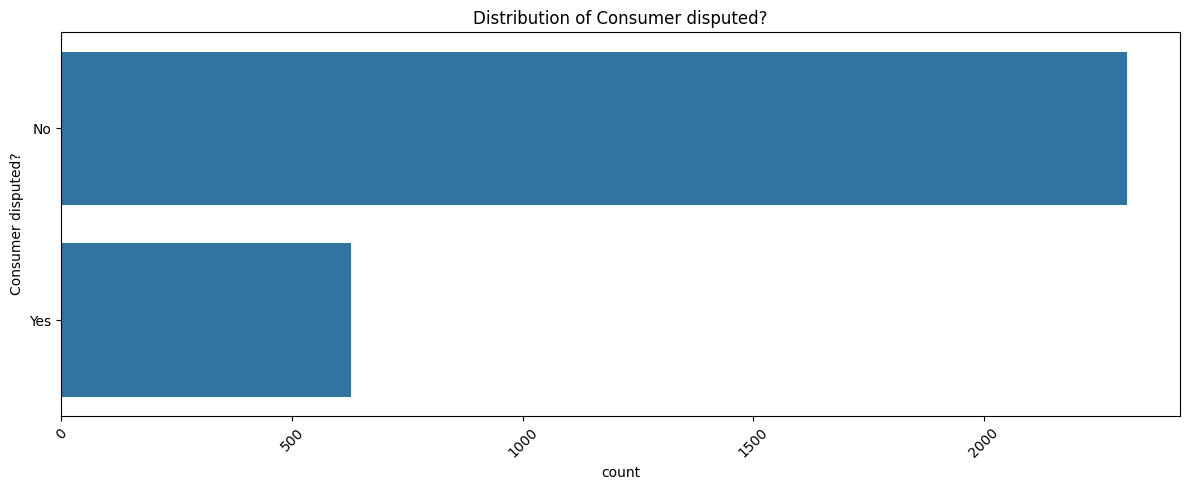

In [79]:
# Enhanced categorical plots with value labels

cat_vars = ['Product', 'Sub-product', 'Issue', 'Sub-issue', 'Company', 'State',
            'Submitted via', 'Company response to consumer', 'Timely response?', 'Consumer disputed?']
for col in cat_vars:
    if col in df.columns:
        plt.figure(figsize=(12,5))
        order = df[col].value_counts().index
        sns.countplot(data=df, y=col if df[col].nunique() < 20 else None, x=col if df[col].nunique() >= 20 else None, order=order)
        plt.title(f"Distribution of {col}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

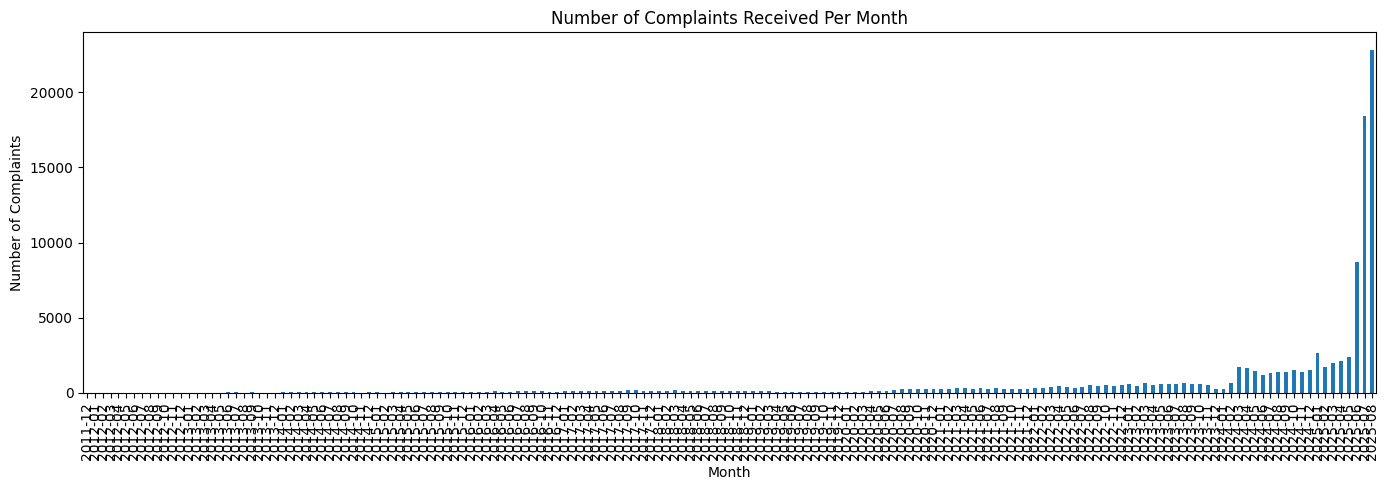

In [80]:
#Distribution of Date Variables

# Convert date columns to datetime
date_cols = ['Date received', 'Date sent to company']
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# Plot number of complaints over time
if 'Date received' in df.columns:
    plt.figure(figsize=(14,5))
    df['Date received'].dt.to_period('M').value_counts().sort_index().plot(kind='bar')
    plt.title('Number of Complaints Received Per Month')
    plt.xlabel('Month')
    plt.ylabel('Number of Complaints')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

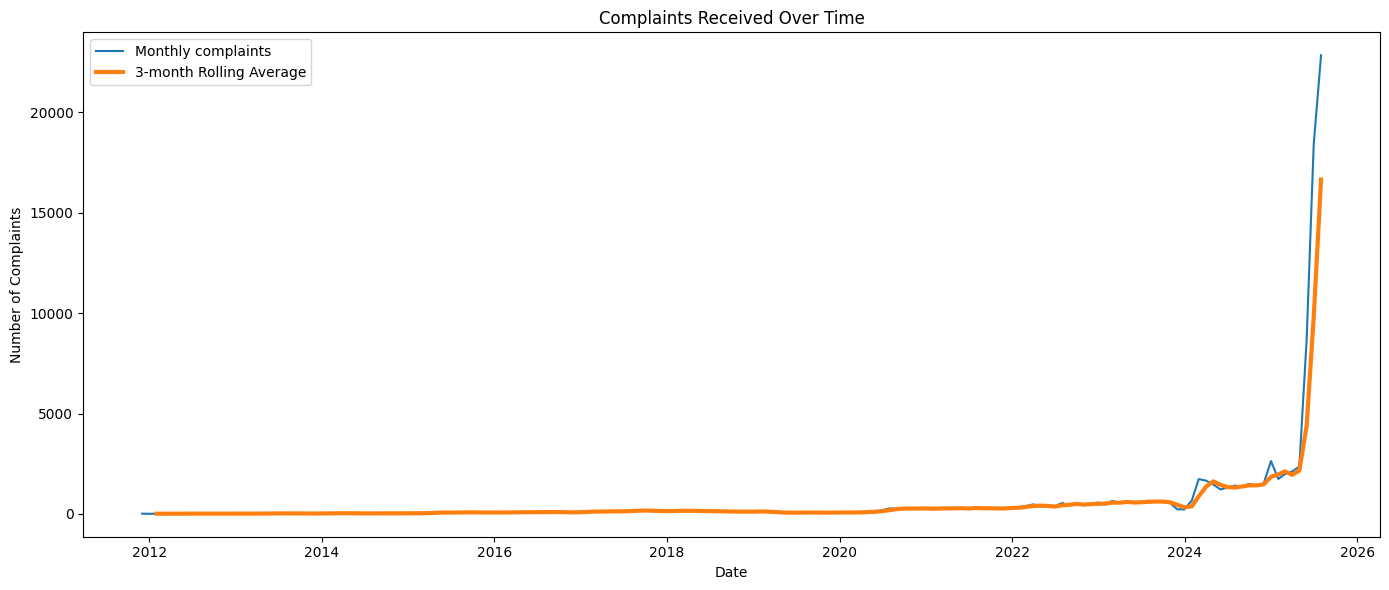

In [81]:
 #Time trend with rolling average of complaints received monthly
if 'Date received' in df.columns:
    df['Date received'] = pd.to_datetime(df['Date received'], errors='coerce')
    monthly_counts = df.groupby(df['Date received'].dt.to_period('M')).size().to_frame('counts')
    monthly_counts.index = monthly_counts.index.to_timestamp()

    plt.figure(figsize=(14,6))
    plt.plot(monthly_counts.index, monthly_counts['counts'], label='Monthly complaints')
    plt.plot(monthly_counts.index, monthly_counts['counts'].rolling(window=3).mean(), label='3-month Rolling Average', linewidth=3)
    plt.title('Complaints Received Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Complaints')
    plt.legend()
    plt.tight_layout()
    plt.show()

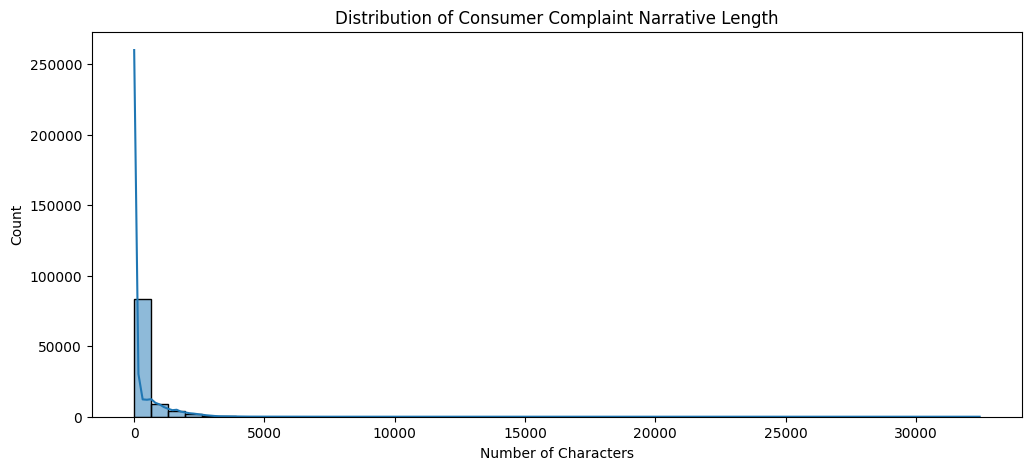

In [82]:
 #Text Length Analysis for Consumer complaint narrative

if 'Consumer complaint narrative' in df.columns:
    df['narrative_length'] = df['Consumer complaint narrative'].fillna('').apply(len)
    plt.figure(figsize=(12,5))
    sns.histplot(df['narrative_length'], bins=50, kde=True)
    plt.title('Distribution of Consumer Complaint Narrative Length')
    plt.xlabel('Number of Characters')
    plt.show()

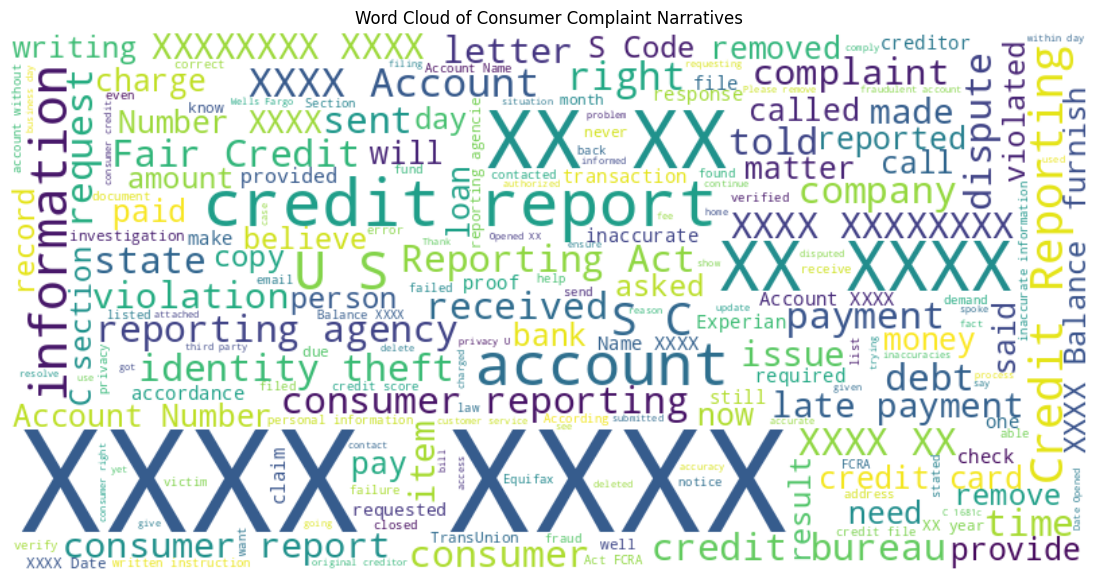

In [83]:
#Complaint narrative text analysis: Word cloud and sentiment

# Combine all narratives into one large text
narratives = df['Consumer complaint narrative'].dropna().str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(narratives)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Consumer Complaint Narratives')
plt.show()

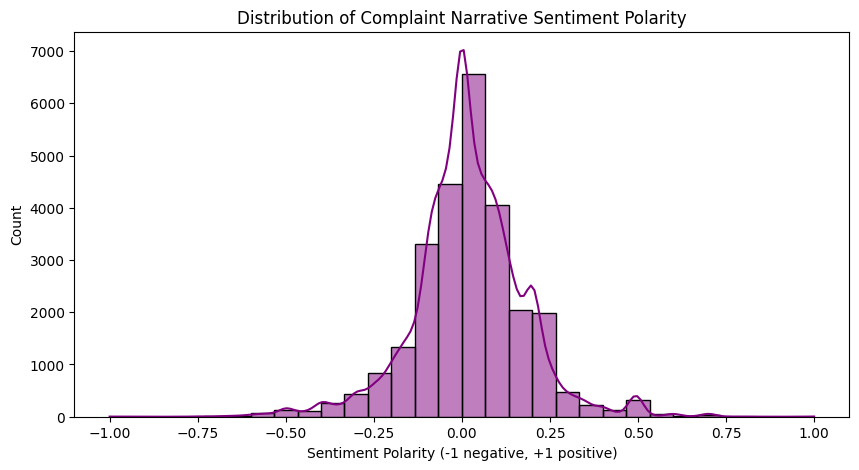

In [84]:
#Sentiment analysis (TextBlob)
def get_sentiment(text):
    if pd.isna(text) or text.strip() == '':
        return np.nan
    return TextBlob(text).sentiment.polarity

df['sentiment'] = df['Consumer complaint narrative'].apply(get_sentiment)

plt.figure(figsize=(10,5))
sns.histplot(df['sentiment'].dropna(), bins=30, kde=True, color='purple')
plt.title('Distribution of Complaint Narrative Sentiment Polarity')
plt.xlabel('Sentiment Polarity (-1 negative, +1 positive)')
plt.show()

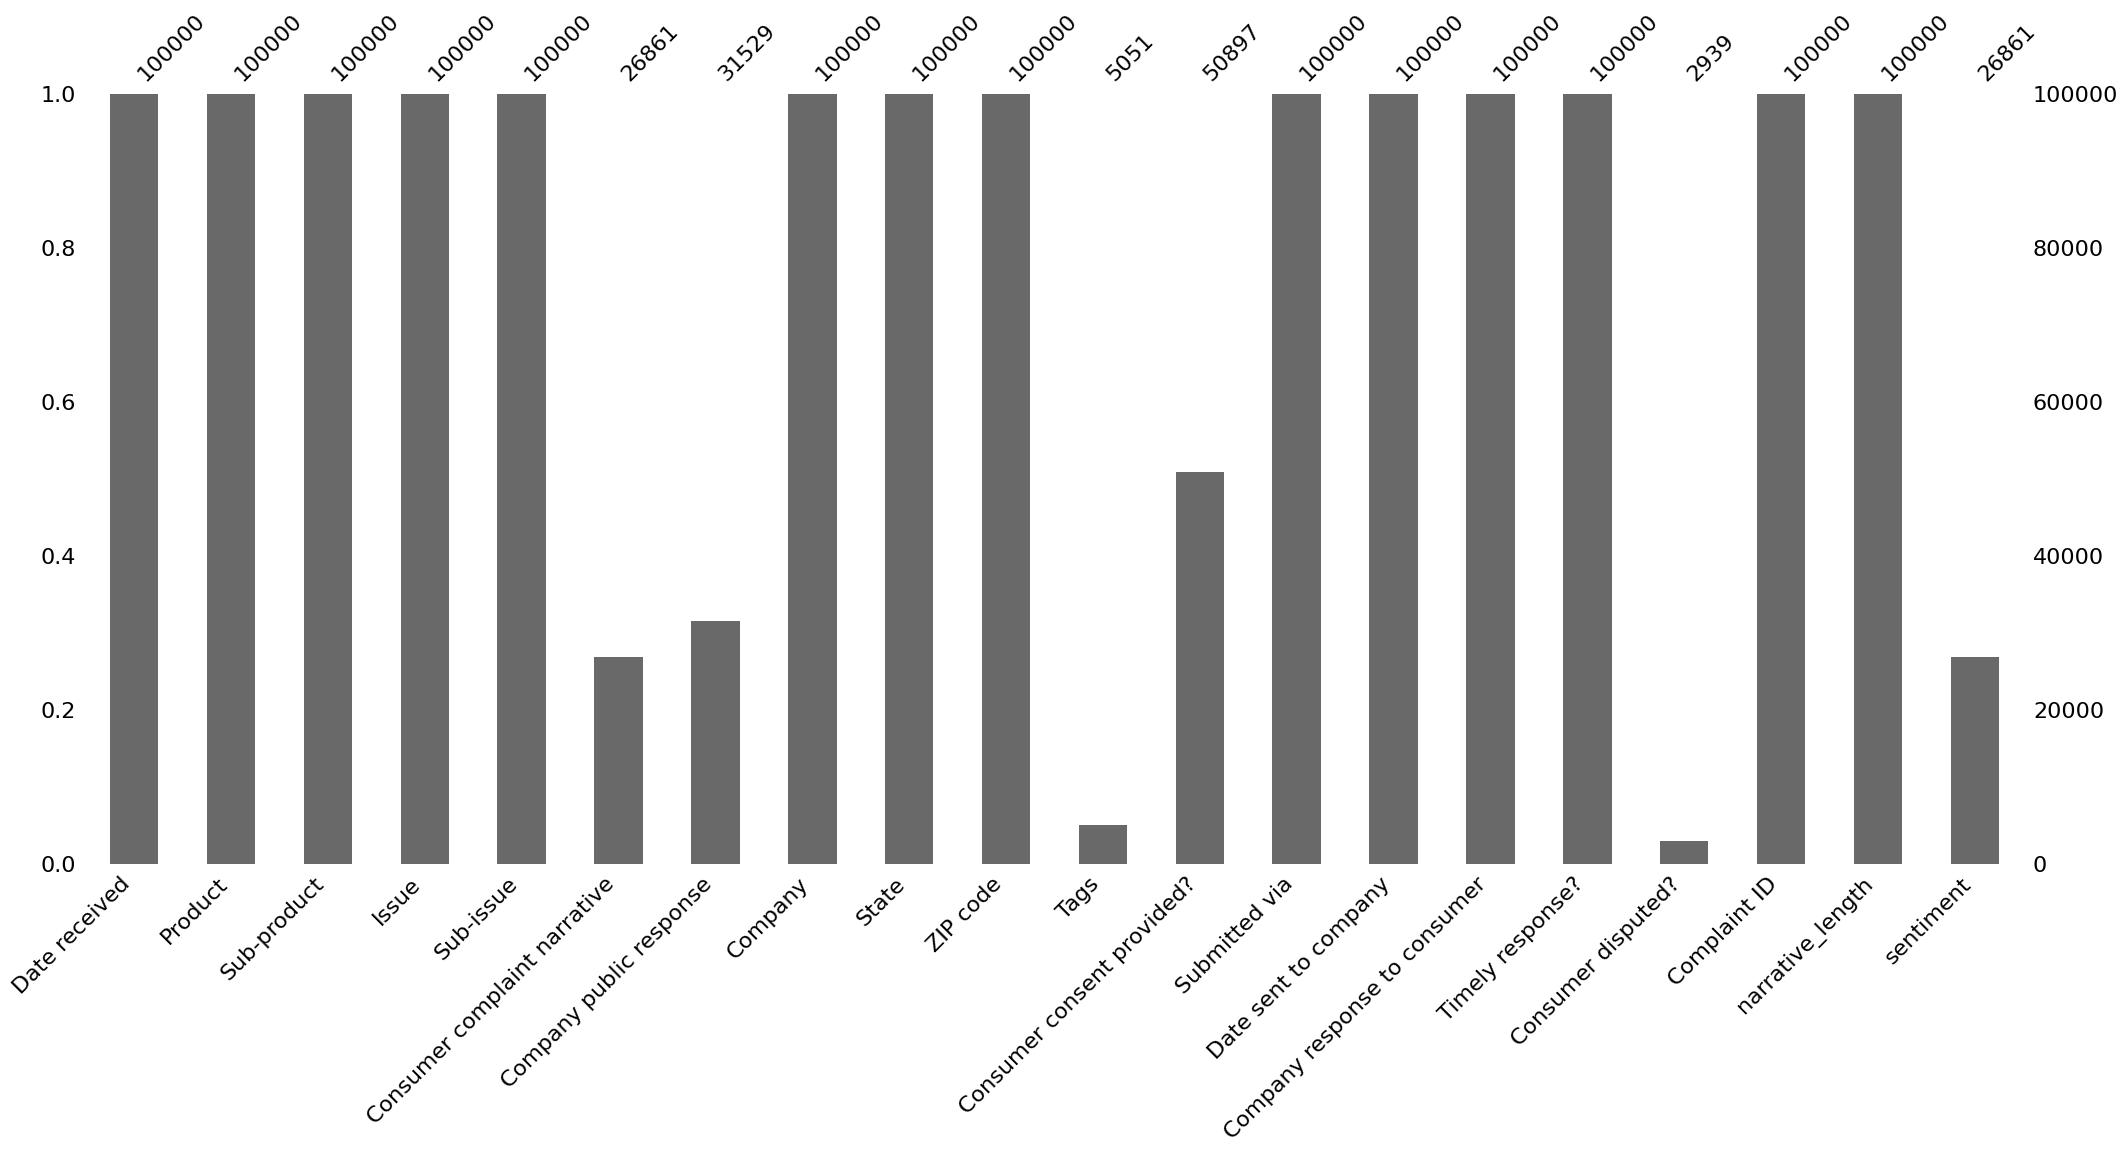

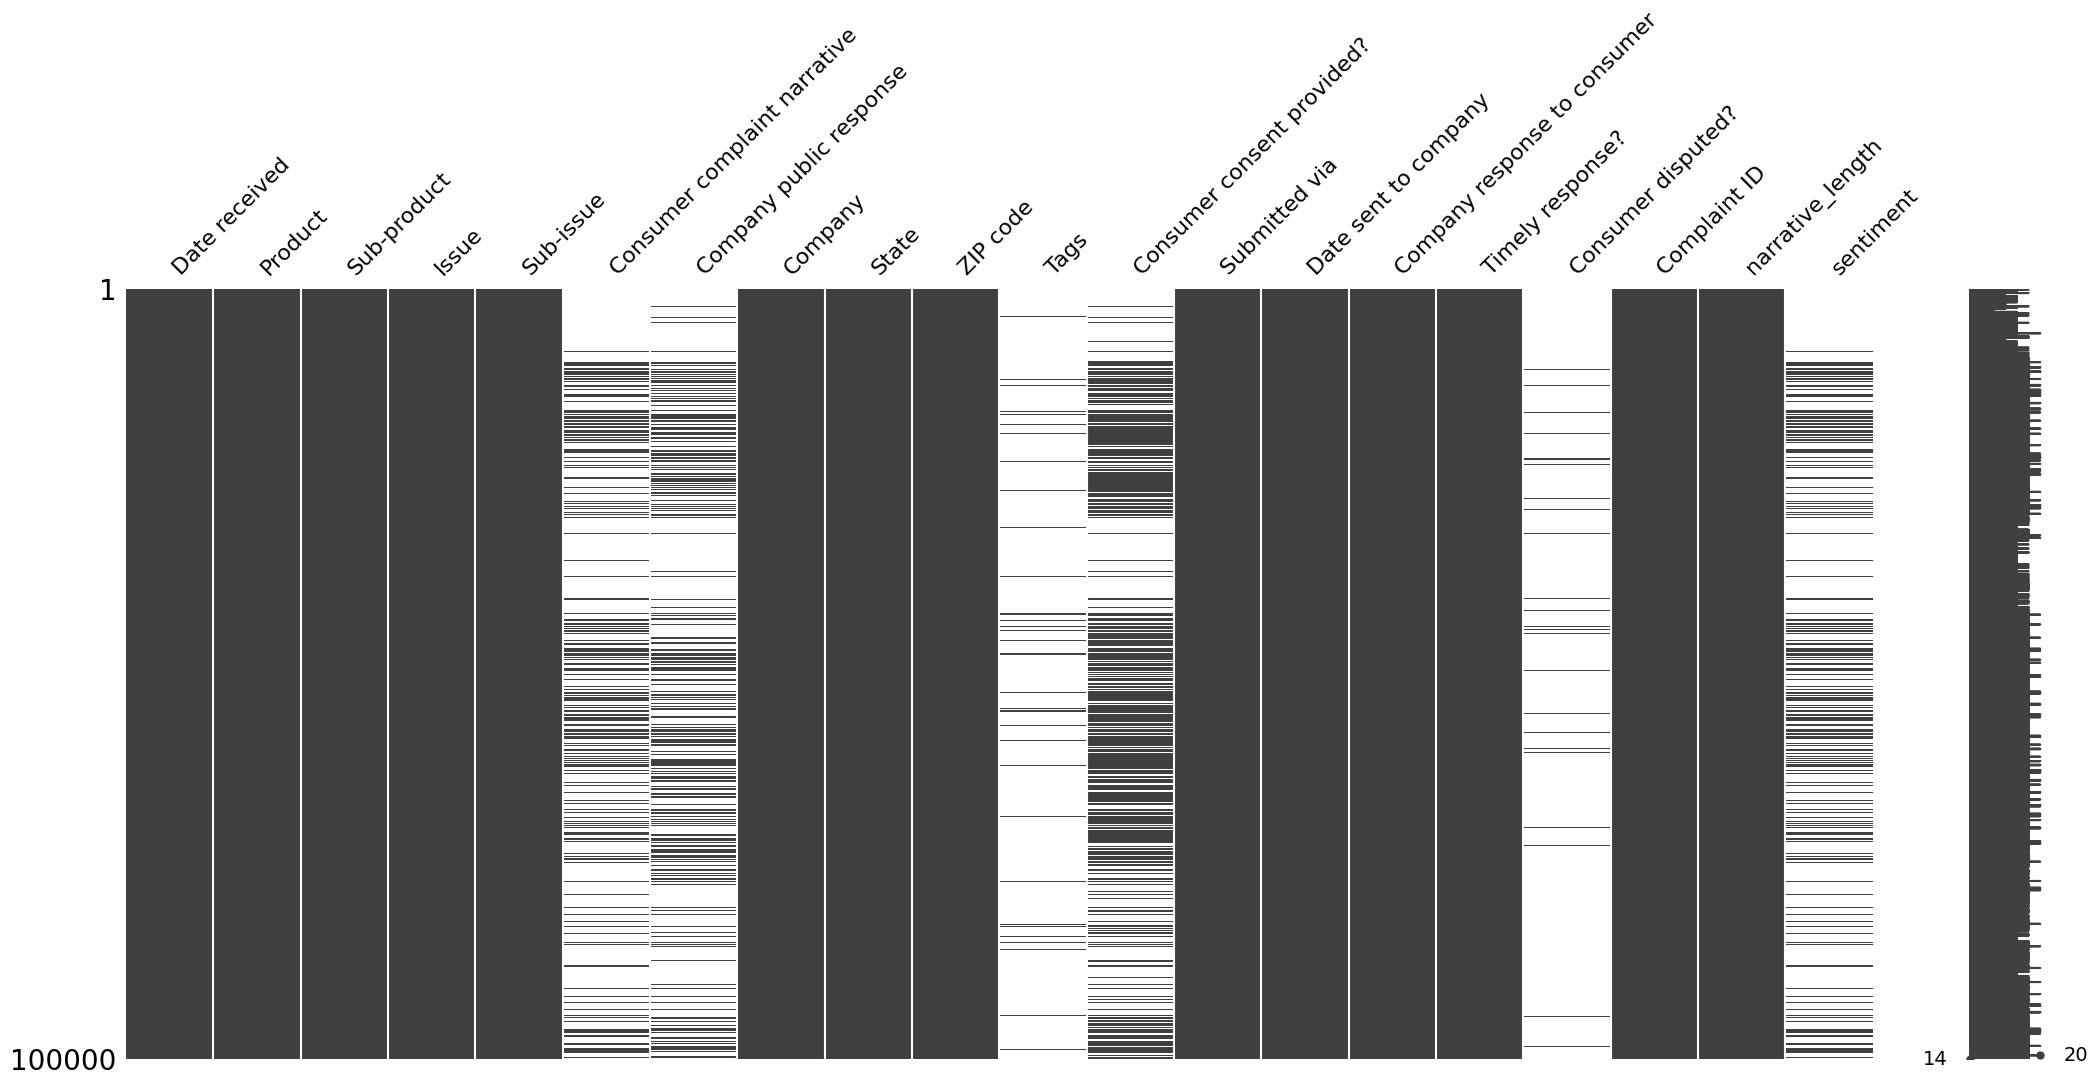

In [85]:
# Missing Values Visualization

import missingno as msno
msno.bar(df)
plt.show()

msno.matrix(df)
plt.show()


Percentage Distribution of Company Responses by Product:
 Company response to consumer                           Closed  \
Product                                                         
Bank account or service                              4.193548   
Checking or savings account                          0.000000   
Consumer Loan                                        1.538462   
Credit card                                          0.051308   
Credit card or prepaid card                          0.000000   
Credit reporting                                     0.484653   
Credit reporting or other personal consumer rep...   0.000000   
Credit reporting, credit repair services, or ot...   0.000000   
Debt collection                                      0.341880   
Debt or credit management                            0.000000   
Money transfer, virtual currency, or money service   0.000000   
Money transfers                                      0.000000   
Mortgage                       

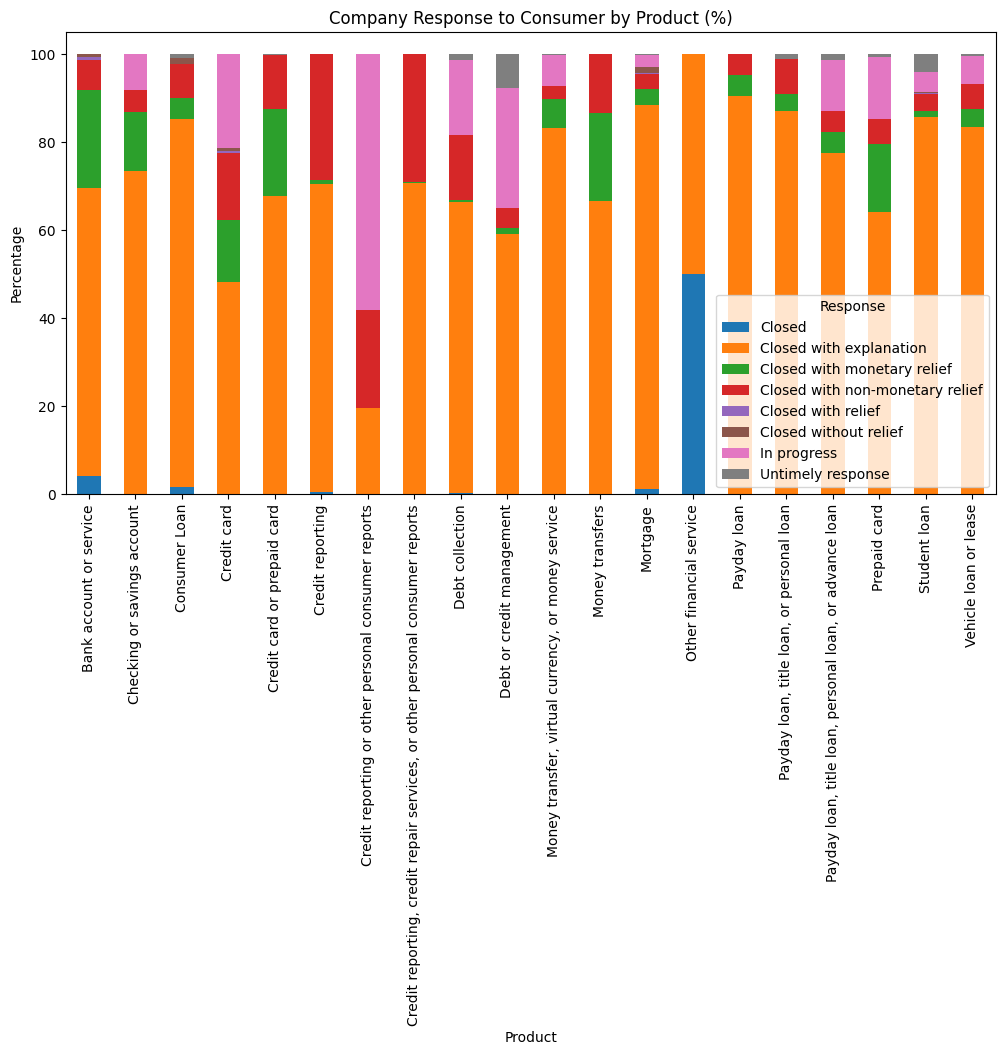

In [86]:
# Cross-tabulations & Relationships

# Complaints by Product and Company Response
if all(x in df.columns for x in ['Product', 'Company response to consumer']):
    cross_tab = pd.crosstab(df['Product'], df['Company response to consumer'], normalize='index') * 100
    print("\nPercentage Distribution of Company Responses by Product:\n", cross_tab)

    cross_tab.plot(kind='bar', stacked=True, figsize=(12,6))
    plt.title('Company Response to Consumer by Product (%)')
    plt.ylabel('Percentage')
    plt.legend(title='Response')
    plt.show()

Chi-square test for Product vs Company Response: chi2=48803.45, p-value=0.0000


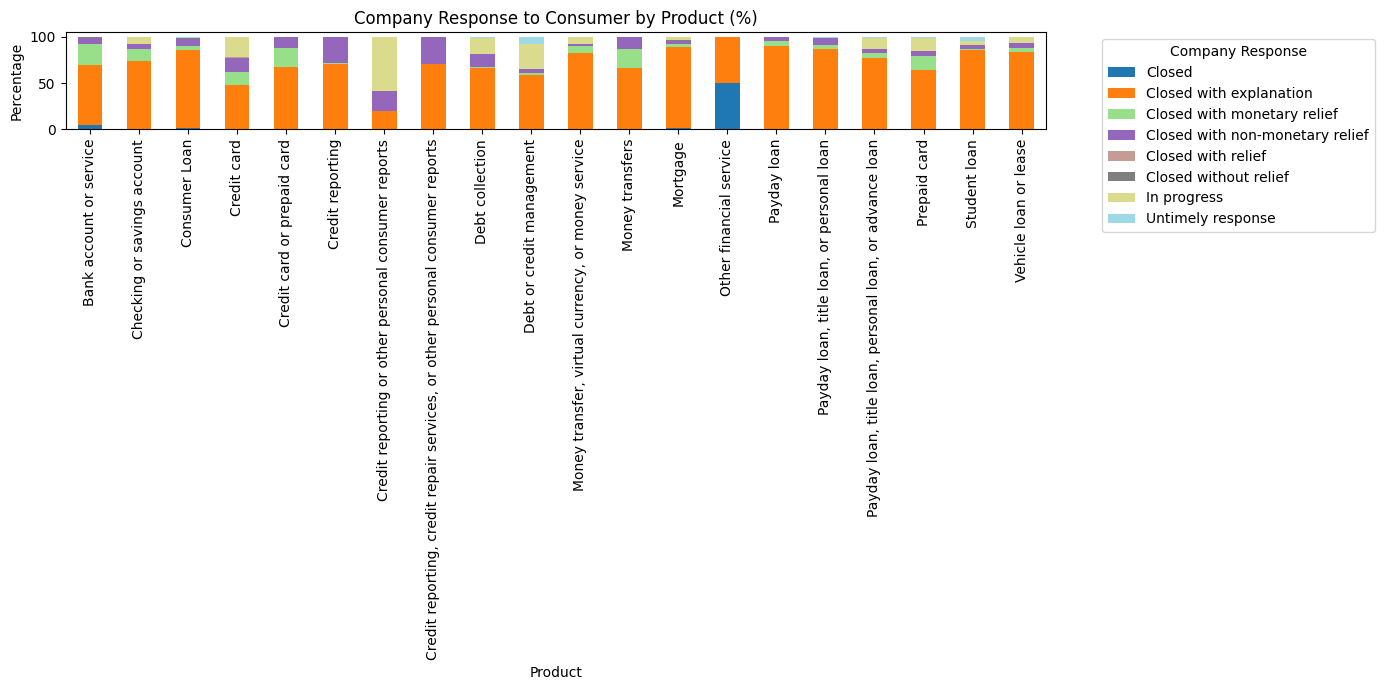

In [87]:
#Cross-tab with chi-square test: Product vs Company Response
if all(x in df.columns for x in ['Product', 'Company response to consumer']):
    cross_tab = pd.crosstab(df['Product'], df['Company response to consumer'])
    chi2, p, dof, ex = chi2_contingency(cross_tab)
    print(f"Chi-square test for Product vs Company Response: chi2={chi2:.2f}, p-value={p:.4f}")
    cross_tab_norm = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100
    cross_tab_norm.plot(kind='bar', stacked=True, figsize=(14,7), colormap='tab20')
    plt.title('Company Response to Consumer by Product (%)')
    plt.ylabel('Percentage')
    plt.legend(title='Company Response', bbox_to_anchor=(1.05,1), loc='upper left')
    plt.tight_layout()
    plt.show()


Percentage of Timely Responses by Product:
 Timely response?                                           No         Yes
Product                                                                  
Bank account or service                              3.225806   96.774194
Checking or savings account                          0.766937   99.233063
Consumer Loan                                       10.000000   90.000000
Credit card                                          0.513084   99.486916
Credit card or prepaid card                          0.997151   99.002849
Credit reporting                                     0.161551   99.838449
Credit reporting or other personal consumer rep...   0.091375   99.908625
Credit reporting, credit repair services, or ot...   0.405154   99.594846
Debt collection                                      3.465423   96.534577
Debt or credit management                           12.121212   87.878788
Money transfer, virtual currency, or money service   1.113763   98.

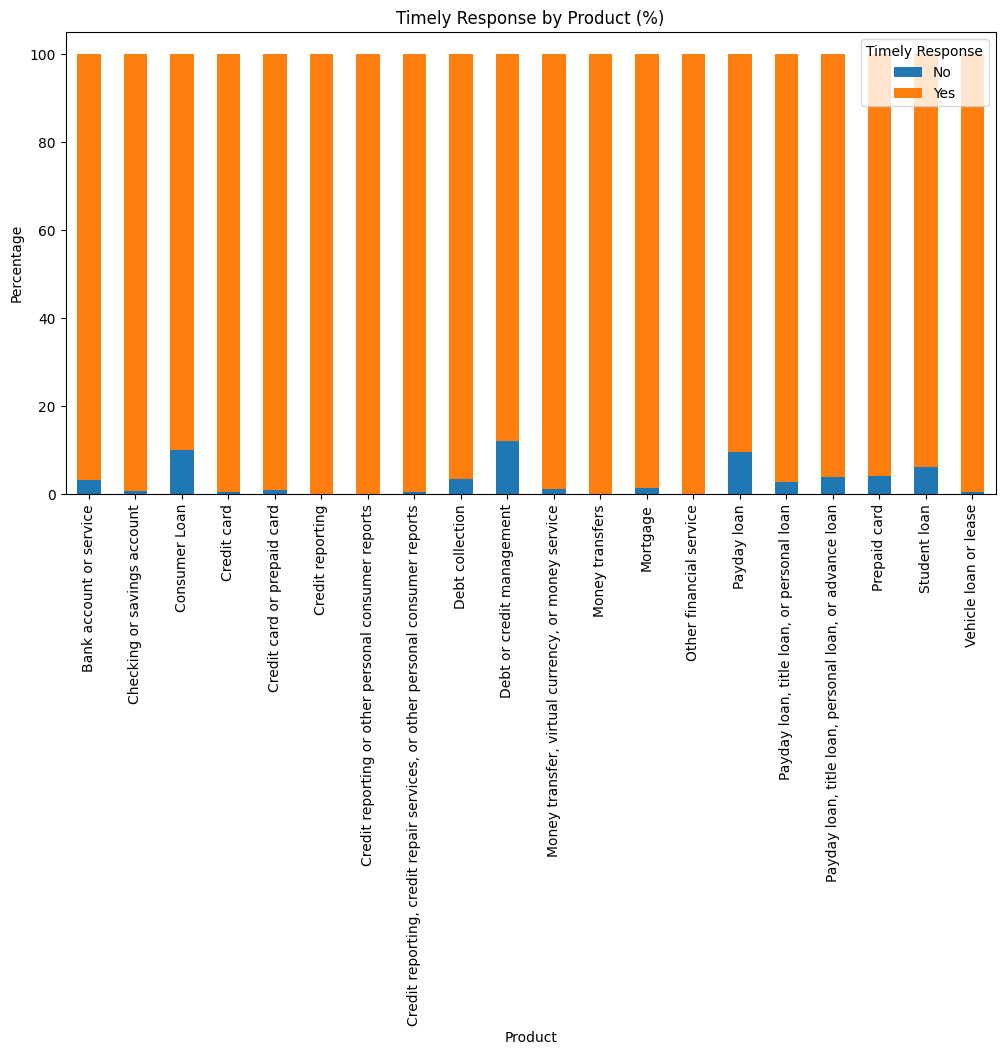

In [88]:
#Timely Response by Product
if all(x in df.columns for x in ['Product', 'Timely response?']):
    timely_tab = pd.crosstab(df['Product'], df['Timely response?'], normalize='index') * 100
    print("\nPercentage of Timely Responses by Product:\n", timely_tab)

    timely_tab.plot(kind='bar', stacked=True, figsize=(12,6))
    plt.title('Timely Response by Product (%)')
    plt.ylabel('Percentage')
    plt.legend(title='Timely Response')
    plt.show()

Consumer disputed?
NaN    97061
No      2310
Yes      629
Name: count, dtype: int64


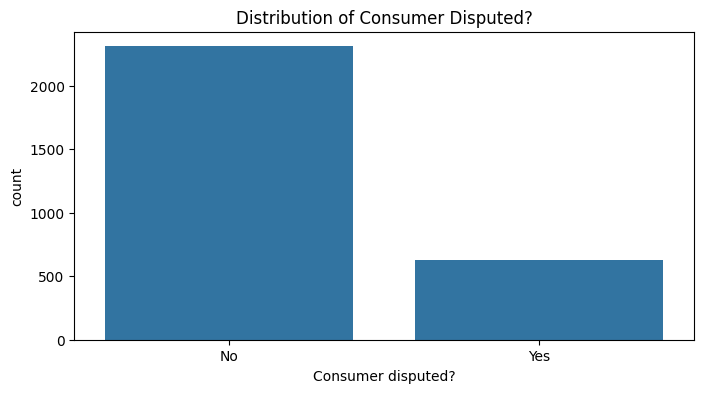

In [89]:
#Consumer Disputed? Analysis

if 'Consumer disputed?' in df.columns:
    print(df['Consumer disputed?'].value_counts(dropna=False))
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x='Consumer disputed?')
    plt.title('Distribution of Consumer Disputed?')
    plt.show()


In [90]:
#  Geospatial analysis by state (basic choropleth)
if 'State' in df.columns:
    state_counts = df['State'].value_counts().reset_index()
    state_counts.columns = ['state', 'count']

    # Load US states geometry data from plotly
    fig = px.choropleth(state_counts,
                        locations='state',
                        locationmode='USA-states',
                        color='count',
                        scope='usa',
                        color_continuous_scale="Viridis",
                        title='Number of Complaints by State')
    fig.show()

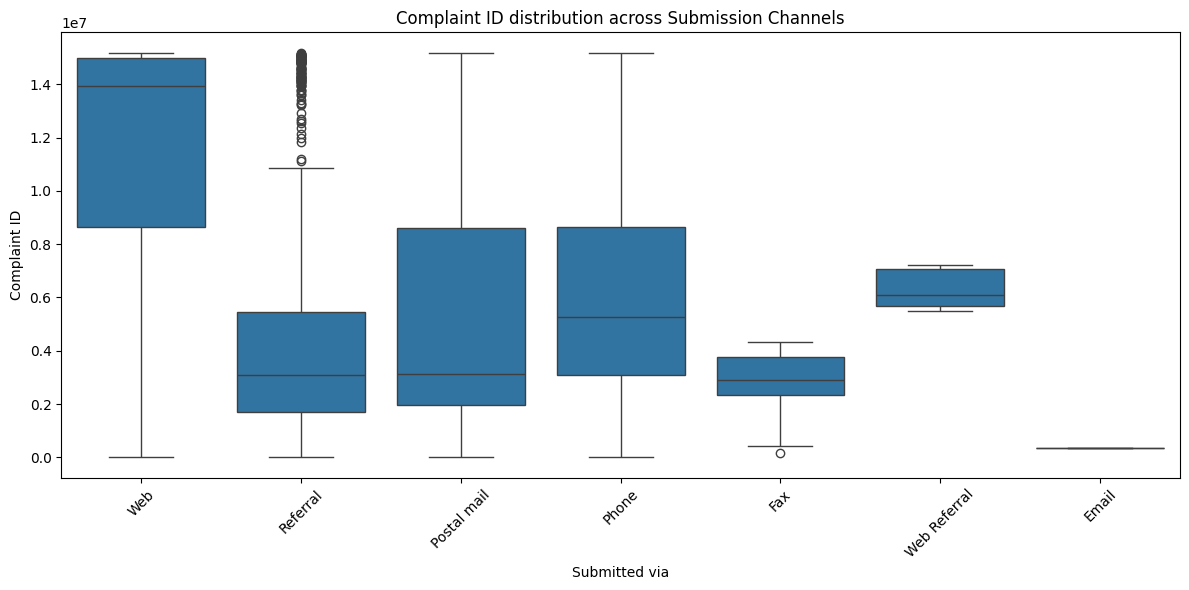

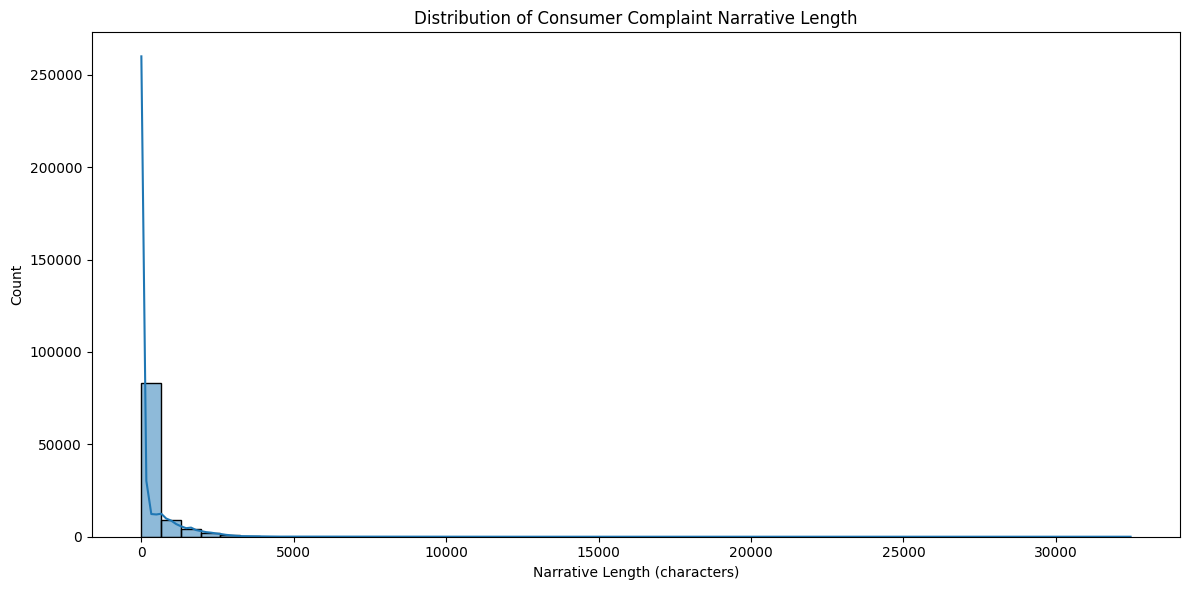

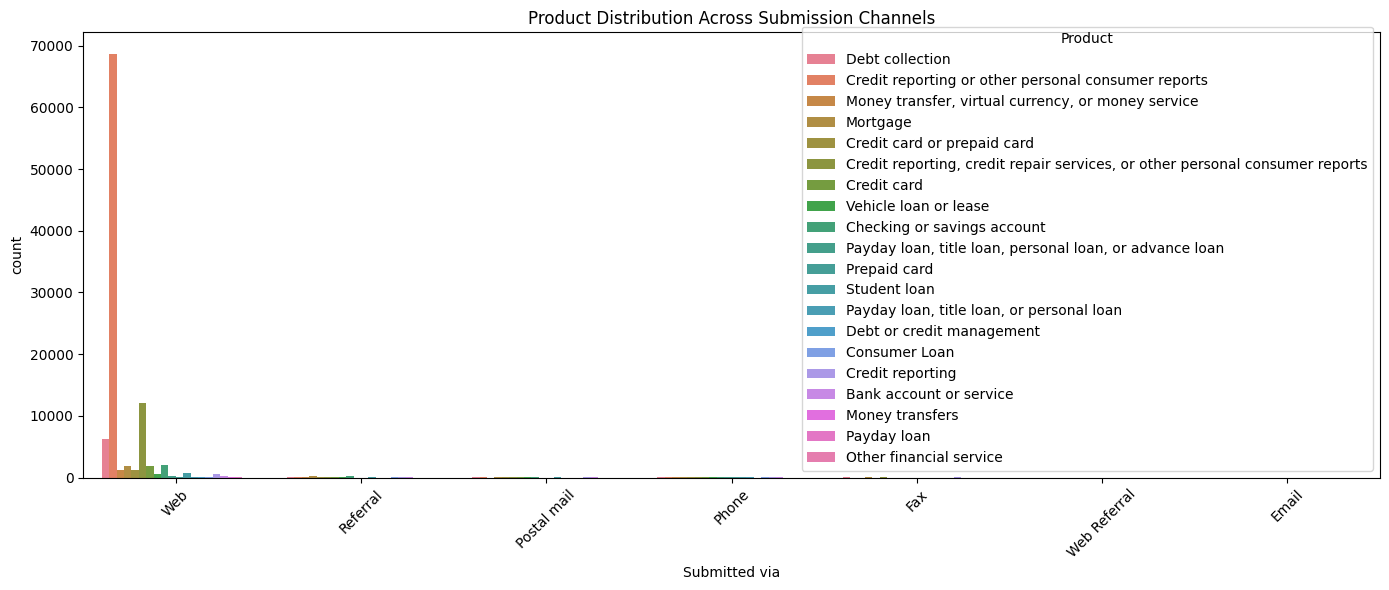

In [91]:


# Boxplot: Complaint ID by Submission Channel
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Submitted via', y='Complaint ID')
plt.title('Complaint ID distribution across Submission Channels')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Histogram + KDE: Narrative length
if 'narrative_length' in df.columns:
    plt.figure(figsize=(12,6))
    sns.histplot(df['narrative_length'], bins=50, kde=True)
    plt.title('Distribution of Consumer Complaint Narrative Length')
    plt.xlabel('Narrative Length (characters)')
    plt.tight_layout()
    plt.show()

# Countplot: Product vs Submission Channel
plt.figure(figsize=(14,6))
sns.countplot(data=df, x='Submitted via', hue='Product')
plt.title('Product Distribution Across Submission Channels')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


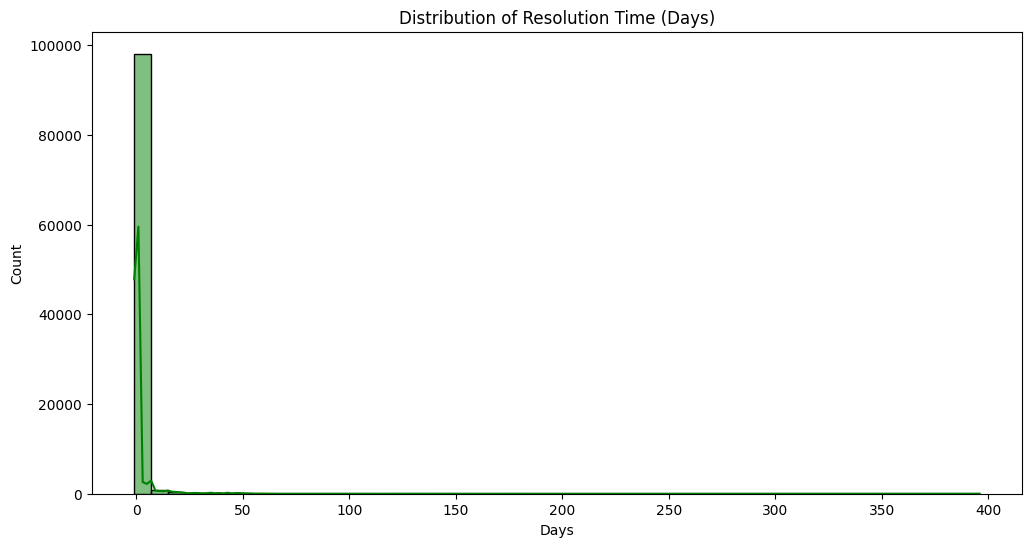

Average resolution time: 0.49 days
Median resolution time: 0.00 days


In [92]:
#Resolution time analysis (days between received and sent to company)
if all(x in df.columns for x in ['Date received', 'Date sent to company']):
    df['Date received'] = pd.to_datetime(df['Date received'], errors='coerce')
    df['Date sent to company'] = pd.to_datetime(df['Date sent to company'], errors='coerce')
    df['resolution_days'] = (df['Date sent to company'] - df['Date received']).dt.days

    plt.figure(figsize=(12,6))
    sns.histplot(df['resolution_days'].dropna(), bins=50, kde=True, color='green')
    plt.title('Distribution of Resolution Time (Days)')
    plt.xlabel('Days')
    plt.show()

    print(f"Average resolution time: {df['resolution_days'].mean():.2f} days")
    print(f"Median resolution time: {df['resolution_days'].median():.2f} days")

In [93]:
#Save cleaned and preprocessed sample ---
df.to_csv('cfpb_sample_eda_cleaned.csv', index=False)
print("Saved sample EDA cleaned dataset.")

Saved sample EDA cleaned dataset.
